In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
car_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names=['symboling','normalized-losses',	'make',	'fuel-type	','aspiration','	num-of-doors	','body-style	','drive-wheels'	,'engine-location'	,'wheel-base','length',	'width',	'height',	'curb-weight',	'engine-type',	'num-of-cylinders',	'engine-size',	'fuel-system',	'bore',	'stroke',	'compression-ratio',	'horsepower',	'peak-rpm',	'city-mpg',	'highway-mpg',	'price'])
car_data.transpose()


,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type\t,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
\tnum-of-doors\t,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style\t,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [3]:
car_data.dtypes 

symboling              int64
normalized-losses     object
make                  object
fuel-type\t           object
aspiration            object
\tnum-of-doors\t      object
body-style\t          object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
#droping following coloumns due to low varience filter , 
#as these coloumns have only signal type data hence less impact on model.

car_data=car_data.drop('engine-location',axis=1)
car_data=car_data.drop('\tnum-of-doors\t',axis=1)
car_data=car_data.drop('body-style\t',axis=1)
car_data=car_data.drop('drive-wheels',axis=1)

car_data=car_data.drop('fuel-system',axis=1)


In [5]:
car_data

,symboling,normalized-losses,make,fuel-type\t,aspiration,wheel-base,length,width,height,curb-weight,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,94.5,171.2,65.5,52.4,2823,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,99.8,176.6,66.2,54.3,2337,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,99.4,176.6,66.4,54.3,2824,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,109.1,188.8,68.9,55.5,2952,...,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,109.1,188.8,68.8,55.5,3049,...,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,109.1,188.8,68.9,55.5,3012,...,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,109.1,188.8,68.9,55.5,3217,...,six,145,3.01,3.40,23.0,106,4800,26,27,22470


In [15]:
#machine learning algorithm can not handle string datatype

car_data['num-of-cylinders']=car_data['num-of-cylinders'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'twelve':12})


In [16]:
car_data=car_data.replace('?',np.nan)
#change atribute type from object to float
car_data['bore']=car_data['bore'].astype('float64')
car_data['stroke']=car_data['stroke'].astype('float64')
car_data['horsepower']=car_data['horsepower'].astype('float64')
car_data['peak-rpm']=car_data['peak-rpm'].astype('float64')
car_data['price']=car_data['price'].astype('float64')
car_data['normalized-losses']=car_data['normalized-losses'].astype('float64')


In [17]:
#fill up NaN with median
car_data['price']=car_data['price'].fillna(car_data['price'].median())
car_data['stroke']=car_data['stroke'].fillna(car_data['stroke'].median())
car_data['horsepower']=car_data['horsepower'].fillna(car_data['horsepower'].median())
car_data['peak-rpm']=car_data['peak-rpm'].fillna(car_data['peak-rpm'].median())
car_data['normalized-losses']=car_data['normalized-losses'].fillna(car_data['normalized-losses'].median())
car_data['bore']=car_data['bore'].fillna(car_data['bore'].median())
car_data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type\t           object
aspiration            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [18]:
car_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,120.600000,31.805105,65.00,101.00,115.00,137.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94


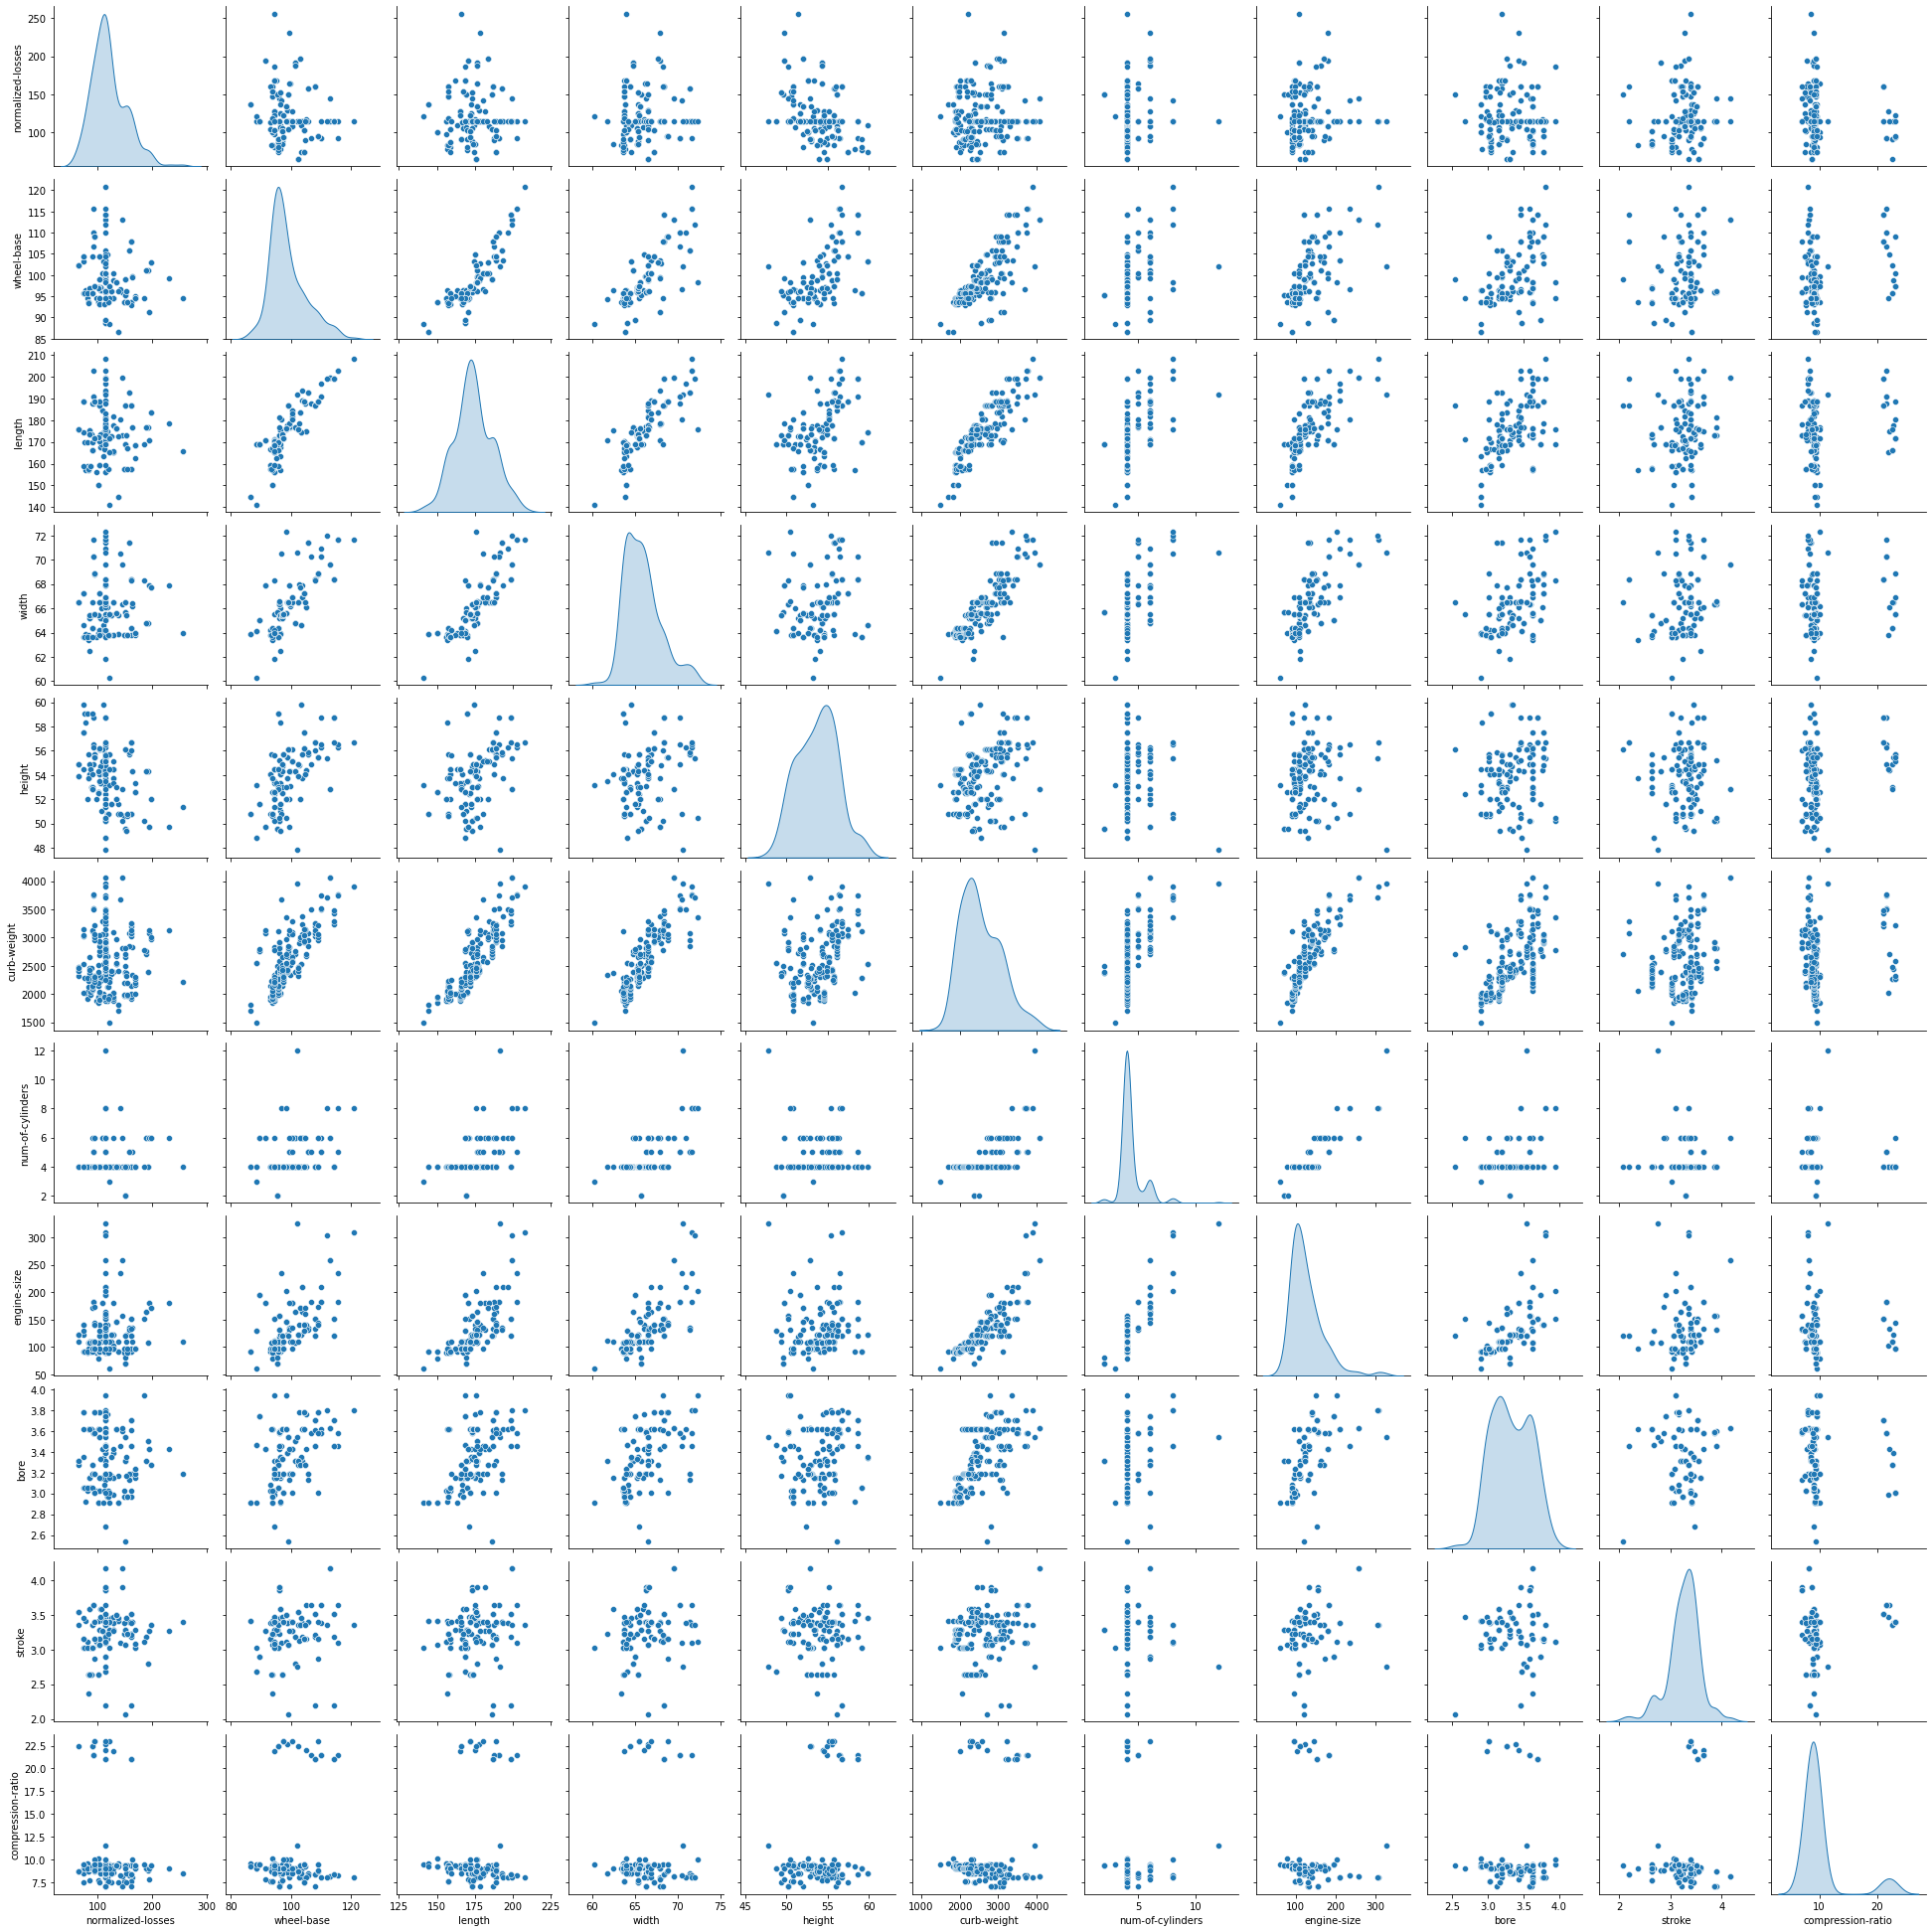

In [19]:
car_data_attr=car_data.iloc[:,1:16]
sns.pairplot(car_data_attr,diag_kind='kde')
#sns.pairplot(car_data,diag_kind='kde')

In [20]:
#copy all predictor variable in X dataframe , mpg is dependent variable hence drop it
X=car_data.drop('price',axis=1)
# removing this as we have created new cylinder out of this
X=X.drop('make',axis=1) #It is string
X=X.drop('fuel-type\t',axis=1)
X=X.drop('curb-weight',axis=1)
X=X.drop('engine-type',axis=1)
X=X.drop('aspiration',axis=1)
#copy mpg data in y variable as it is dependent variable or our target
y=car_data[['price']]

In [21]:
#lets break X and y dataset in test and train dataset
from sklearn.model_selection import train_test_split

In [22]:
#split X and y in training and test dataset in ratio of 75:25
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1 )

In [23]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [24]:
#lets explore coeficient of each indipendent atribute
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for symboling is 125.8022462315776
The coefficient for normalized-losses is -2.212278897475214
The coefficient for wheel-base is 72.50169871258863
The coefficient for length is -99.52126402339938
The coefficient for width is 449.7447716120498
The coefficient for height is 298.725138724275
The coefficient for num-of-cylinders is -3095.022013156483
The coefficient for engine-size is 247.0866482813696
The coefficient for bore is -6707.229498320511
The coefficient for stroke is -5033.287213776592
The coefficient for compression-ratio is 320.6114664273089
The coefficient for horsepower is -2.819131445479242
The coefficient for peak-rpm is 2.521571764861319
The coefficient for city-mpg is -209.11345952528393
The coefficient for highway-mpg is -18.279899707991905


In [25]:
#R^2=1-SSR/SST
regression_model.score(X_test,y_test)

0.8371391966359583

In [31]:
import statsmodels.formula.api as smf
#put price and predictor coloumn in singal array
cars=pd.concat([y_train,X_train],axis=1)
cars.head()

,price,symboling,normalized-losses,wheel-base,length,width,height,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
14,24565.0,1,115.0,103.5,189.0,66.9,55.7,6,164,3.31,3.19,9.0,121.0,4250.0,20,25
162,9258.0,0,91.0,95.7,166.3,64.4,52.8,4,98,3.19,3.03,9.0,70.0,4800.0,28,34
59,8845.0,1,129.0,98.8,177.8,66.5,53.7,4,122,3.39,3.39,8.6,84.0,4800.0,26,32
19,6295.0,1,98.0,94.5,155.9,63.6,52.0,4,90,3.03,3.11,9.6,70.0,5400.0,38,43
177,11248.0,-1,65.0,102.4,175.6,66.5,53.9,4,122,3.31,3.54,8.7,92.0,4200.0,27,32
